# Compiling national Landsat scenes using Landsatxplore

Landsatxplore [package link](https://github.com/yannforget/landsatxplore)

Various download errors have to do with how package loops through possible dataset ids for download URL. 

Updated earthexplorer.py [link](https://github.com/yannforget/landsatxplore/blob/afe09431437210da902937c4d22453ca79cd1243/landsatxplore/earthexplorer.py)

## Scene search -- 15% cloud cover, 2013-05-01 to 2023-08-31

In [5]:
# Specify your EarthExplorer username and password
username = ''
password = ''

In [6]:
# Import continental US landsat scene centroids
import geopandas as gpd

centroid_shp_path = r"../WRS2_conUSA_CentroidPoints/WRS2_conUSA_CentroidPoints.shp"
centroid_gdf = gpd.read_file(centroid_shp_path)


In [7]:
# Subset five scene centroids for testing

#centroid_gdf_sample = centroid_gdf.sample(n=10)
#sample_coord_list = [(x,y) for x,y in zip(centroid_gdf_sample['geometry'].x, centroid_gdf_sample['geometry'].y)]


# Get list of x,y coordinates of scene centroids
coord_list = [(x,y) for x,y in zip(centroid_gdf['geometry'].x, centroid_gdf['geometry'].y)]
print('There are', len(coord_list), 'scenes covering the continental US.')

There are 457 scenes covering the continental US.


In [8]:
import json
from landsatxplore.api import API

# Initialize a new API instance and get an access key
api = API(username, password)

# Get list of Landsat C2L2 scenes from 05-01-2013 to 08-31-2023 with max 15% Cloud cover
scenes= []
for i in range(len(coord_list)):
    coord_scenes = []
    coord_scenes = api.search(
        dataset='landsat_ot_c2_l2',
        latitude=coord_list[i][1],
        longitude=coord_list[i][0],
        start_date='2013-05-01',
        end_date='2023-08-31',
        max_cloud_cover=15)
    #print(f"{len(coord_scenes)} scenes found for {coord_list[i]}.")
    scenes.append(coord_scenes)

In [9]:
scenes_2013_05_01_2023_08_31_15pc_CC = []
for sublist in scenes:
    for scene in sublist:
        scenes_2013_05_01_2023_08_31_15pc_CC.append(scene)
        
print("Number of centroid coordinate pairs:", len(scenes))
print("Number of individual scenes:", len(scenes_2013_05_01_2023_08_31_15pc_CC))

Number of centroid coordinate pairs: 457
Number of individual scenes: 39170


In [10]:
# Print scene metadata example
scenes_2013_05_01_2023_08_31_15pc_CC[0]

{'cloud_cover': 14,
 'entity_id': 'LC80130272023205LGN00',
 'display_id': 'LC08_L2SP_013027_20230724_20230803_02_T1',
 'ordering_id': 'None',
 'landsat_product_id': 'LC08_L1TP_013027_20230724_20230803_02_T1',
 'landsat_scene_id': 'LC80130272023205LGN00',
 'acquisition_date': datetime.datetime(2023, 7, 24, 0, 0),
 'collection_category': datetime.datetime(2023, 11, 1, 0, 0),
 'collection_number': 2,
 'wrs_path': 13,
 'wrs_row': 27,
 'target_wrs_path': 13,
 'target_wrs_row': 27,
 'nadir-off_nadir': 'NADIR',
 'roll_angle': -0.001,
 'date_product_generated': datetime.datetime(2023, 8, 3, 0, 0),
 'start_time': datetime.datetime(2023, 7, 24, 15, 31, 11),
 'stop_time': datetime.datetime(2023, 7, 24, 15, 31, 43),
 'station_id': 'LGN',
 'day-night_indicator': 'DAY',
 'land_cloud_cover': 15.12,
 'scene_cloud_cover': 13.76,
 'ground_control_points_model': 761,
 'ground_control_points_version': 5,
 'geometric_rmse_model': 6.605,
 'geometric_rmse_model_x': 4.236,
 'geometric_rmse_model_y': 5.069,
 '

In [11]:
# Dictionary keys to retain for dataframe

keep_columns = ['cloud_cover', 
                'entity_id', 
                'display_id',
                'landsat_product_id',
                'landsat_scene_id', 
                'acquisition_date', 
                'collection_category', 
                'collection_number', 
                'wrs_path', 
                'wrs_row', 
                'target_wrs_path', 
                'target_wrs_row', 
                'day-night_indicator', 
                'land_cloud_cover', 
                'scene_cloud_cover',
                'satellite',
                'scene_center_latitude',
                'scene_center_longitude']              

In [12]:
import pandas as pd
df_2013_05_01_2023_08_31_15pc_CC = pd.DataFrame.from_dict(scenes_2013_05_01_2023_08_31_15pc_CC, orient = 'columns')
df_2013_05_01_2023_08_31_15pc_CC = df_2013_05_01_2023_08_31_15pc_CC[keep_columns]

In [13]:
df_2013_05_01_2023_08_31_15pc_CC

,cloud_cover,entity_id,display_id,landsat_product_id,landsat_scene_id,acquisition_date,collection_category,collection_number,wrs_path,wrs_row,target_wrs_path,target_wrs_row,day-night_indicator,land_cloud_cover,scene_cloud_cover,satellite,scene_center_latitude,scene_center_longitude
0,14,LC80130272023205LGN00,LC08_L2SP_013027_20230724_20230803_02_T1,LC08_L1TP_013027_20230724_20230803_02_T1,LC80130272023205LGN00,2023-07-24,2023-11-01,2,13,27,13,27,DAY,15.12,13.76,8,47.44894,-70.82976
1,0,LC90130272023149LGN00,LC09_L2SP_013027_20230529_20230602_02_T1,LC09_L1TP_013027_20230529_20230602_02_T1,LC90130272023149LGN00,2023-05-29,2023-11-01,2,13,27,13,27,DAY,0.04,0.04,9,47.44903,-70.89959
2,9,LC90130272023037LGN01,LC09_L2SP_013027_20230206_20230311_02_T1,LC09_L1TP_013027_20230206_20230311_02_T1,LC90130272023037LGN01,2023-02-06,2023-11-01,2,13,27,13,27,DAY,8.81,8.55,9,47.44929,-70.91011
3,1,LC80130272022346LGN00,LC08_L2SP_013027_20221212_20221219_02_T1,LC08_L1TP_013027_20221212_20221219_02_T1,LC80130272022346LGN00,2022-12-12,2023-11-01,2,13,27,13,27,DAY,0.64,0.61,8,47.44917,-70.85704
4,1,LC90130272022306LGN01,LC09_L2SP_013027_20221102_20230323_02_T1,LC09_L1TP_013027_20221102_20230323_02_T1,LC90130272022306LGN01,2022-11-02,2023-11-01,2,13,27,13,27,DAY,1.11,1.00,9,47.44921,-70.84659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39165,3,LC80380382018334LGN00,LC08_L2SP_038038_20181130_20200830_02_T1,LC08_L1TP_038038_20181130_20200830_02_T1,LC80380382018334LGN00,2018-11-30,2023-11-01,2,38,38,38,38,DAY,2.89,3.13,8,31.74227,-114.45987
39166,0,LC80380382018270LGN00,LC08_L2SP_038038_20180927_20200830_02_T1,LC08_L1TP_038038_20180927_20200830_02_T1,LC80380382018270LGN00,2018-09-27,2023-11-01,2,38,38,38,38,DAY,0.00,0.00,8,31.74206,-114.44769
39167,0,LC80380382018254LGN00,LC08_L2SP_038038_20180911_20200830_02_T1,LC08_L1TP_038038_20180911_20200830_02_T1,LC80380382018254LGN00,2018-09-11,2023-11-01,2,38,38,38,38,DAY,0.00,0.00,8,31.74208,-114.44337
39168,0,LC80380382018238LGN00,LC08_L2SP_038038_20180826_20200831_02_T1,LC08_L1TP_038038_20180826_20200831_02_T1,LC80380382018238LGN00,2018-08-26,2023-11-01,2,38,38,38,38,DAY,0.00,0.02,8,31.74193,-114.44625


In [14]:
# Keep unique scenes only
df_2013_05_01_2023_08_31_15pc_CC = df_2013_05_01_2023_08_31_15pc_CC.drop_duplicates(subset = ['display_id'], keep = 'first')

In [15]:
# Add acquisition date column for summer filtering

df_2013_05_01_2023_08_31_15pc_CC['acquisition_month'] = df_2013_05_01_2023_08_31_15pc_CC['acquisition_date'].astype(str).str.split("-").str[1]

C:\Users\ak6915\AppData\Local\Temp/ipykernel_20364/3089535918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2013_05_01_2023_08_31_15pc_CC['acquisition_month'] = df_2013_05_01_2023_08_31_15pc_CC['acquisition_date'].astype(str).str.split("-").str[1]


In [16]:
df_2013_05_01_2023_08_31_15pc_CC

,cloud_cover,entity_id,display_id,landsat_product_id,landsat_scene_id,acquisition_date,collection_category,collection_number,wrs_path,wrs_row,target_wrs_path,target_wrs_row,day-night_indicator,land_cloud_cover,scene_cloud_cover,satellite,scene_center_latitude,scene_center_longitude,acquisition_month
0,14,LC80130272023205LGN00,LC08_L2SP_013027_20230724_20230803_02_T1,LC08_L1TP_013027_20230724_20230803_02_T1,LC80130272023205LGN00,2023-07-24,2023-11-01,2,13,27,13,27,DAY,15.12,13.76,8,47.44894,-70.82976,07
1,0,LC90130272023149LGN00,LC09_L2SP_013027_20230529_20230602_02_T1,LC09_L1TP_013027_20230529_20230602_02_T1,LC90130272023149LGN00,2023-05-29,2023-11-01,2,13,27,13,27,DAY,0.04,0.04,9,47.44903,-70.89959,05
2,9,LC90130272023037LGN01,LC09_L2SP_013027_20230206_20230311_02_T1,LC09_L1TP_013027_20230206_20230311_02_T1,LC90130272023037LGN01,2023-02-06,2023-11-01,2,13,27,13,27,DAY,8.81,8.55,9,47.44929,-70.91011,02
3,1,LC80130272022346LGN00,LC08_L2SP_013027_20221212_20221219_02_T1,LC08_L1TP_013027_20221212_20221219_02_T1,LC80130272022346LGN00,2022-12-12,2023-11-01,2,13,27,13,27,DAY,0.64,0.61,8,47.44917,-70.85704,12
4,1,LC90130272022306LGN01,LC09_L2SP_013027_20221102_20230323_02_T1,LC09_L1TP_013027_20221102_20230323_02_T1,LC90130272022306LGN01,2022-11-02,2023-11-01,2,13,27,13,27,DAY,1.11,1.00,9,47.44921,-70.84659,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39165,3,LC80380382018334LGN00,LC08_L2SP_038038_20181130_20200830_02_T1,LC08_L1TP_038038_20181130_20200830_02_T1,LC80380382018334LGN00,2018-11-30,2023-11-01,2,38,38,38,38,DAY,2.89,3.13,8,31.74227,-114.45987,11
39166,0,LC80380382018270LGN00,LC08_L2SP_038038_20180927_20200830_02_T1,LC08_L1TP_038038_20180927_20200830_02_T1,LC80380382018270LGN00,2018-09-27,2023-11-01,2,38,38,38,38,DAY,0.00,0.00,8,31.74206,-114.44769,09
39167,0,LC80380382018254LGN00,LC08_L2SP_038038_20180911_20200830_02_T1,LC08_L1TP_038038_20180911_20200830_02_T1,LC80380382018254LGN00,2018-09-11,2023-11-01,2,38,38,38,38,DAY,0.00,0.00,8,31.74208,-114.44337,09
39168,0,LC80380382018238LGN00,LC08_L2SP_038038_20180826_20200831_02_T1,LC08_L1TP_038038_20180826_20200831_02_T1,LC80380382018238LGN00,2018-08-26,2023-11-01,2,38,38,38,38,DAY,0.00,0.02,8,31.74193,-114.44625,08


In [17]:
df_summer = df_2013_05_01_2023_08_31_15pc_CC[df_2013_05_01_2023_08_31_15pc_CC.acquisition_month.isin(['05','06','07','08'])]

In [18]:
df_summer

,cloud_cover,entity_id,display_id,landsat_product_id,landsat_scene_id,acquisition_date,collection_category,collection_number,wrs_path,wrs_row,target_wrs_path,target_wrs_row,day-night_indicator,land_cloud_cover,scene_cloud_cover,satellite,scene_center_latitude,scene_center_longitude,acquisition_month
0,14,LC80130272023205LGN00,LC08_L2SP_013027_20230724_20230803_02_T1,LC08_L1TP_013027_20230724_20230803_02_T1,LC80130272023205LGN00,2023-07-24,2023-11-01,2,13,27,13,27,DAY,15.12,13.76,8,47.44894,-70.82976,07
1,0,LC90130272023149LGN00,LC09_L2SP_013027_20230529_20230602_02_T1,LC09_L1TP_013027_20230529_20230602_02_T1,LC90130272023149LGN00,2023-05-29,2023-11-01,2,13,27,13,27,DAY,0.04,0.04,9,47.44903,-70.89959,05
6,13,LC80130272022138LGN00,LC08_L2SP_013027_20220518_20220525_02_T1,LC08_L1TP_013027_20220518_20220525_02_T1,LC80130272022138LGN00,2022-05-18,2023-11-01,2,13,27,13,27,DAY,14.76,13.34,8,47.44920,-70.84263,05
7,1,LC90130272022130LGN01,LC09_L2SP_013027_20220510_20230417_02_T1,LC09_L1TP_013027_20220510_20230417_02_T1,LC90130272022130LGN01,2022-05-10,2023-11-01,2,13,27,13,27,DAY,0.76,0.69,9,47.44921,-70.89854,05
8,0,LC80130272022122LGN00,LC08_L2SP_013027_20220502_20220511_02_T1,LC08_L1TP_013027_20220502_20220511_02_T1,LC80130272022122LGN00,2022-05-02,2023-11-01,2,13,27,13,27,DAY,0.10,0.09,8,47.44912,-70.83591,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39159,7,LC80380382019193LGN00,LC08_L2SP_038038_20190712_20200827_02_T1,LC08_L1TP_038038_20190712_20200827_02_T1,LC80380382019193LGN00,2019-07-12,2023-11-01,2,38,38,38,38,DAY,8.82,7.08,8,31.74233,-114.44683,07
39160,12,LC80380382019161LGN00,LC08_L2SP_038038_20190610_20200828_02_T1,LC08_L1TP_038038_20190610_20200828_02_T1,LC80380382019161LGN00,2019-06-10,2023-11-01,2,38,38,38,38,DAY,1.17,11.93,8,31.74206,-114.46707,06
39161,12,LC80380382019145LGN00,LC08_L2SP_038038_20190525_20200828_02_T1,LC08_L1TP_038038_20190525_20200828_02_T1,LC80380382019145LGN00,2019-05-25,2023-11-01,2,38,38,38,38,DAY,0.06,12.24,8,31.74217,-114.46616,05
39168,0,LC80380382018238LGN00,LC08_L2SP_038038_20180826_20200831_02_T1,LC08_L1TP_038038_20180826_20200831_02_T1,LC80380382018238LGN00,2018-08-26,2023-11-01,2,38,38,38,38,DAY,0.00,0.02,8,31.74193,-114.44625,08


With a 15% cloud cover threshold, there are 15,200 summer Landsat Collection 2 Level 2 scenes covering the continential United states between 05-01-2013 and 08-31-2023.

## Scene analysis

Cloud cover is not evenly distributed across the United States. With a large number of available scenes, cloud cover filtering strictness can vary in proportion to available scenes per footprint.

What is the distribution of scene counts per footprint?

In [19]:
# Create single path row column
df_summer.loc[:,'wrs_pathRow'] ='0' + df_summer.wrs_path.astype(str) + "0" + df_summer.wrs_row.astype(str)

C:\Users\ak6915\.conda\envs\ak-gc\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [20]:
df_summer

,cloud_cover,entity_id,display_id,landsat_product_id,landsat_scene_id,acquisition_date,collection_category,collection_number,wrs_path,wrs_row,target_wrs_path,target_wrs_row,day-night_indicator,land_cloud_cover,scene_cloud_cover,satellite,scene_center_latitude,scene_center_longitude,acquisition_month,wrs_pathRow
0,14,LC80130272023205LGN00,LC08_L2SP_013027_20230724_20230803_02_T1,LC08_L1TP_013027_20230724_20230803_02_T1,LC80130272023205LGN00,2023-07-24,2023-11-01,2,13,27,13,27,DAY,15.12,13.76,8,47.44894,-70.82976,07,013027
1,0,LC90130272023149LGN00,LC09_L2SP_013027_20230529_20230602_02_T1,LC09_L1TP_013027_20230529_20230602_02_T1,LC90130272023149LGN00,2023-05-29,2023-11-01,2,13,27,13,27,DAY,0.04,0.04,9,47.44903,-70.89959,05,013027
6,13,LC80130272022138LGN00,LC08_L2SP_013027_20220518_20220525_02_T1,LC08_L1TP_013027_20220518_20220525_02_T1,LC80130272022138LGN00,2022-05-18,2023-11-01,2,13,27,13,27,DAY,14.76,13.34,8,47.44920,-70.84263,05,013027
7,1,LC90130272022130LGN01,LC09_L2SP_013027_20220510_20230417_02_T1,LC09_L1TP_013027_20220510_20230417_02_T1,LC90130272022130LGN01,2022-05-10,2023-11-01,2,13,27,13,27,DAY,0.76,0.69,9,47.44921,-70.89854,05,013027
8,0,LC80130272022122LGN00,LC08_L2SP_013027_20220502_20220511_02_T1,LC08_L1TP_013027_20220502_20220511_02_T1,LC80130272022122LGN00,2022-05-02,2023-11-01,2,13,27,13,27,DAY,0.10,0.09,8,47.44912,-70.83591,05,013027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39159,7,LC80380382019193LGN00,LC08_L2SP_038038_20190712_20200827_02_T1,LC08_L1TP_038038_20190712_20200827_02_T1,LC80380382019193LGN00,2019-07-12,2023-11-01,2,38,38,38,38,DAY,8.82,7.08,8,31.74233,-114.44683,07,038038
39160,12,LC80380382019161LGN00,LC08_L2SP_038038_20190610_20200828_02_T1,LC08_L1TP_038038_20190610_20200828_02_T1,LC80380382019161LGN00,2019-06-10,2023-11-01,2,38,38,38,38,DAY,1.17,11.93,8,31.74206,-114.46707,06,038038
39161,12,LC80380382019145LGN00,LC08_L2SP_038038_20190525_20200828_02_T1,LC08_L1TP_038038_20190525_20200828_02_T1,LC80380382019145LGN00,2019-05-25,2023-11-01,2,38,38,38,38,DAY,0.06,12.24,8,31.74217,-114.46616,05,038038
39168,0,LC80380382018238LGN00,LC08_L2SP_038038_20180826_20200831_02_T1,LC08_L1TP_038038_20180826_20200831_02_T1,LC80380382018238LGN00,2018-08-26,2023-11-01,2,38,38,38,38,DAY,0.00,0.02,8,31.74193,-114.44625,08,038038


In [21]:
# Get raster counts per path-row scene

scene_counts = df_summer.groupby(['wrs_pathRow']).count()
scene_counts = scene_counts.iloc[:,[1]]
scene_counts = scene_counts.rename(columns = {'entity_id' : 'count'})


In [22]:
scene_counts

,count
wrs_pathRow,
010028,25
010029,22
011027,20
011028,21
011029,25
...,...
047030,22
047031,23
048026,20


array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

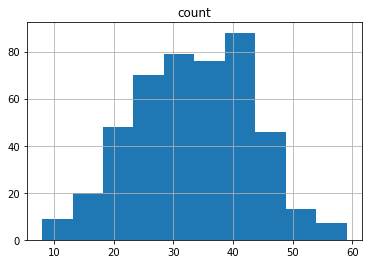

In [23]:
# Display scene count histogram

scene_counts.hist(column = 'count')

The distribution of summer scene counts is approximately normal.

Implement progressive approach to scene filtering: Take top 15 rasters by cloud cover per path/row scene 

In [24]:
wrs_pathRow = df_summer.wrs_pathRow.values.tolist()
wrs_pathRowList = set(wrs_pathRow)

In [25]:
len(wrs_pathRowList)

456

In [26]:
import pandas as pd

df_filteredScenes = pd.DataFrame(columns = list(df_summer.columns))
for i in wrs_pathRowList:
    df = df_summer[df_summer.wrs_pathRow == i]
    df_2 = df.nsmallest(13, 'land_cloud_cover')
    df_filteredScenes = pd.concat([df_filteredScenes, df_2])

In [27]:
df_filteredScenes

,cloud_cover,entity_id,display_id,landsat_product_id,landsat_scene_id,acquisition_date,collection_category,collection_number,wrs_path,wrs_row,target_wrs_path,target_wrs_row,day-night_indicator,land_cloud_cover,scene_cloud_cover,satellite,scene_center_latitude,scene_center_longitude,acquisition_month,wrs_pathRow
431,1,LC90130352022130LGN01,LC09_L2SP_013035_20220510_20230417_02_T2,LC09_L1GT_013035_20220510_20230417_02_T2,LC90130352022130LGN01,2022-05-10,2023-11-02,2,13,35,13,35,DAY,0.00,0.76,9,36.04337,-74.68282,05,013035
472,8,LC80130352016202LGN01,LC08_L2SP_013035_20160720_20200906_02_T1,LC08_L1TP_013035_20160720_20200906_02_T1,LC80130352016202LGN01,2016-07-20,2023-11-01,2,13,35,13,35,DAY,0.00,7.65,8,36.04331,-74.62500,07,013035
448,2,LC80130352019210LGN00,LC08_L2SP_013035_20190729_20200827_02_T1,LC08_L1TP_013035_20190729_20200827_02_T1,LC80130352019210LGN00,2019-07-29,2023-11-01,2,13,35,13,35,DAY,0.02,1.84,8,36.04350,-74.61592,07,013035
413,7,LC90130352023165LGN00,LC09_L2SP_013035_20230614_20230616_02_T1,LC09_L1TP_013035_20230614_20230615_02_T1,LC90130352023165LGN00,2023-06-14,2023-11-01,2,13,35,13,35,DAY,0.10,6.61,9,36.04318,-74.68967,06,013035
430,1,LC80130352022138LGN00,LC08_L2SP_013035_20220518_20220525_02_T1,LC08_L1TP_013035_20220518_20220525_02_T1,LC80130352022138LGN00,2022-05-18,2023-11-01,2,13,35,13,35,DAY,0.10,1.31,8,36.04349,-74.64278,05,013035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25997,0,LC80350292021225LGN00,LC08_L2SP_035029_20210813_20210819_02_T1,LC08_L1TP_035029_20210813_20210819_02_T1,LC80350292021225LGN00,2021-08-13,2023-11-01,2,35,29,35,29,DAY,0.17,0.17,8,44.60824,-105.87372,08,035029
25996,0,LC80350292021241LGN00,LC08_L2SP_035029_20210829_20210909_02_T1,LC08_L1TP_035029_20210829_20210909_02_T1,LC80350292021241LGN00,2021-08-29,2023-11-01,2,35,29,35,29,DAY,0.19,0.19,8,44.60817,-105.87374,08,035029
26062,0,LC80350292014190LGN01,LC08_L2SP_035029_20140709_20200911_02_T1,LC08_L1TP_035029_20140709_20200911_02_T1,LC80350292014190LGN01,2014-07-09,2023-11-01,2,35,29,35,29,DAY,0.22,0.22,8,44.60828,-105.87451,07,035029
26014,0,LC80350292019204LGN00,LC08_L2SP_035029_20190723_20200827_02_T1,LC08_L1TP_035029_20190723_20200827_02_T1,LC80350292019204LGN00,2019-07-23,2023-11-01,2,35,29,35,29,DAY,0.37,0.37,8,44.60806,-105.86341,07,035029


array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

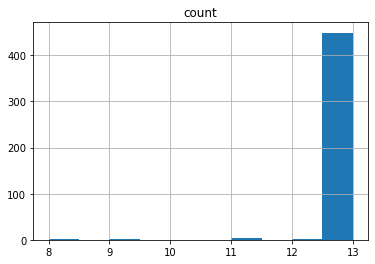

In [28]:
# Get raster counts per path-row scene

scene_counts_filtered = df_filteredScenes.groupby(['wrs_pathRow']).count()
scene_counts_filtered = scene_counts_filtered.iloc[:,[1]]
scene_counts_filtered = scene_counts_filtered.rename(columns = {'entity_id' : 'count'})
scene_counts_filtered.hist(column = 'count')

The majority of scenes have at least 13 images with 15% or less cloud cover over the last 10 years of summer months.

How many do not? Where are they?

In [29]:
scene_counts_lt13 = scene_counts_filtered[scene_counts_filtered['count'] < 13]
scene_counts_lt13

,count
wrs_pathRow,
014035,12
015042,9
016040,12
022039,11
026026,11
048027,11
048028,8


## Scene download


In [30]:
# Specify the download directory where the data will be saved
download_directory = r'directory'

In [35]:
# Get list of entity IDs to download
sceneList_entityid = df_filteredScenes['entity_id'].values.tolist()

In [36]:
# Write scene dataframe to csv
df_filteredScenes.to_csv(r'path\df_filteredScenes.csv')

In [34]:
# Write entity list to json
with open(r'path\sceneList_entityid.json', 'w') as f:
          json.dump(sceneList_entityid, f, indent = 2)

In [ ]:
from landsatxplore.earthexplorer import EarthExplorer

ee = EarthExplorer(username, password)

for i in range(len(sceneList_entityid)):
    print(i) 
    ee.download(sceneList_entityid_subset[i], output_dir=download_directory, dataset='landsat_ot_c2_l2')